<a href="https://colab.research.google.com/github/amit-420/robotic_arm/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3R robotic arm Visualization
### Importing libraries and intializing vairbles
### DH Parameters


In [ ]:
from __future__ import division
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time
%matplotlib notebook


def find_DHparameters(theta1,theta2,theta3,theta4):
    link0,link1,link2,link3 = 0,0,1,0
    theta1,theta2,theta3,theta4 = (pi*theta1)/180,(pi*theta2)/180,(pi*theta3)/180,(pi*theta4)/180
    DHpara = np.array([ [0,  link0, theta1, 0],
                    [-pi/2,link1,theta2,1],
                    [pi/2,link2,theta3, 0],
                    [-pi/2,link3,theta4,1],
                   ])
    return DHpara


#intializing variables
def intialize_variables(iterations):
    z = np.identity(4)
    record = np.zeros((4,4,4))
    #intializing arrays
    x_coordinate_of_2_joint,y_coordinate_of_2_joint,z_coordinate_of_2_joint = np.zeros(iterations),np.zeros(iterations),np.zeros(iterations)
    x_coordinate_of_3_joint,y_coordinate_of_3_joint,z_coordinate_of_3_joint = np.zeros(iterations),np.zeros(iterations),np.zeros(iterations)
    x_coordinate_of_4_joint,y_coordinate_of_4_joint,z_coordinate_of_4_joint = np.zeros(iterations),np.zeros(iterations),np.zeros(iterations)

    return z,record,[x_coordinate_of_2_joint,y_coordinate_of_2_joint,z_coordinate_of_2_joint],[x_coordinate_of_3_joint,y_coordinate_of_3_joint,z_coordinate_of_3_joint],[x_coordinate_of_4_joint,y_coordinate_of_4_joint,z_coordinate_of_4_joint]


print("DH parameters:")
DHpara = find_DHparameters(0,60,30,0)
for i in DHpara:
    print(i)

DH parameters:
[0 0 0 0]
[-pi/2 0 pi/3 1]
[pi/2 1 pi/6 0]
[-pi/2 0 0 1]


### Below `transform_matrix()` function takes in DH parameters and returns transformation matrix 

### Then `find_transformation_wrt_origin()` function finds transformation wrt the 0th frame and then stores it in 'record' matrix

In [ ]:
class transform_matrix:
    def __init__(self, DHpara):
        self.a = DHpara[0]
        self.L = DHpara[1]
        self.t = DHpara[2]
        self.d = DHpara[3]
    def transform(self):
        T = np.array([[cos(self.t),-sin(self.t),0,self.L],
                [sin(self.t)*cos(self.a),cos(self.t)*cos(self.a),-sin(self.a),-sin(self.a)*self.d],
                [sin(self.t)*sin(self.a),cos(self.t)*sin(self.a),cos(self.a),cos(self.a)*self.d],
                [0,0,0,1]])
        return T

def find_transformation_wrt_origin(DHpara,z):
    for i in range(len(DHpara)):
        T = transform_matrix(DHpara[i])
        X = T.transform()
        z = np.dot(z,X)
        record[i] = z
    return record



`get_coordinate_of_joints() ` function takes in joint angles as parameters and returns position of all joints 



In [ ]:
# Initial position of all 3 joints of arm
m0 = np.array([0,0,0,1]) #Location of origin
m1 = np.array([0,0,4,1]) #Location of first joint
m2 = np.array([4,0,4,1]) #Location of second joint before transformation
m3 = np.array([8,0,4,1]) #Location of End-effector before transformation

# DHpara = find_DHparameters(60,60,30,0)
# record = find_transformation_wrt_origin(DHpara,z)
# print(record)

def get_coordinate_of_joints(x1,x2,x3,iterations,coordinate_of_2_joint,coordinate_of_3_joint,coordinate_of_4_joint):
    x_coordinate_of_2_joint,y_coordinate_of_2_joint,z_coordinate_of_2_joint = coordinate_of_2_joint
    x_coordinate_of_3_joint,y_coordinate_of_3_joint,z_coordinate_of_3_joint = coordinate_of_3_joint
    x_coordinate_of_4_joint,y_coordinate_of_4_joint,z_coordinate_of_4_joint = coordinate_of_4_joint
    x1 = np.linspace(0,x1,iterations)
    x2 = np.linspace(0,x2,iterations)
    x3 = np.linspace(0,x3,iterations)
    for i,j,k,no in zip(x1,x2,x3,range(0,iterations)):
        #print(i,j,k)
        DHpara = find_DHparameters(i,j,k,0)
        record = find_transformation_wrt_origin(DHpara,z) 
        x_coordinate_of_2_joint[no] = record[1][0][3]
        y_coordinate_of_2_joint[no] = record[1][1][3]
        z_coordinate_of_2_joint[no] = record[1][2][3]
        x_coordinate_of_3_joint[no] = record[2][0][3]
        y_coordinate_of_3_joint[no] = record[2][1][3]
        z_coordinate_of_3_joint[no] = record[2][2][3]
        x_coordinate_of_4_joint[no] = record[3][0][3]
        y_coordinate_of_4_joint[no] = record[3][1][3]
        z_coordinate_of_4_joint[no] = record[3][2][3]
    print(record) 
    return [x_coordinate_of_2_joint,y_coordinate_of_2_joint,z_coordinate_of_2_joint],[x_coordinate_of_3_joint,y_coordinate_of_3_joint,z_coordinate_of_3_joint],[x_coordinate_of_4_joint,y_coordinate_of_4_joint,z_coordinate_of_4_joint]
    #print(x_coordinate_of_3_joint)
#print(y_coordinate_of_3_joint)
#print(z_coordinate_of_3_joint)


`run_animation()` 

In [ ]:
def run_animation(coordinate_of_2_joint,coordinate_of_3_joint,coordinate_of_4_joint,Frames = 50,frames_per_sec = 10):
    
    x_coordinate_of_2_joint,y_coordinate_of_2_joint,z_coordinate_of_2_joint = coordinate_of_2_joint
    x_coordinate_of_3_joint,y_coordinate_of_3_joint,z_coordinate_of_3_joint = coordinate_of_3_joint
    x_coordinate_of_4_joint,y_coordinate_of_4_joint,z_coordinate_of_4_joint = coordinate_of_4_joint

    fig = plt.figure() 
    ax = Axes3D(fig)
    
    ax.set_xlim3d([0, 3.0])
    ax.set_xlabel('X')

    ax.set_ylim3d([0, 3.0])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-2, 3.0])
    ax.set_zlabel('Z') 
    line, = ax.plot3D([0], [0], [0], lw = 2)
    sing, = ax.plot3D([0], [0], [0], lw = 2)
    def init():  
        #ax.plot3D([0,0,4,8],[0,0,0,0],[0,4,4,4])
        #ax.plot3D([0,0,4,8],[4,4,4,4],[0,4,4,4])
        line.set_data([],[])  
        line.set_3d_properties([])
        sing.set_data([],[])  
        sing.set_3d_properties([])
        #line = plt.plot(x_coordinate_of_3_joint, y_coordinate_of_3_joint, z_coordinate_of_3_joint, lw=2, c='g')[0] 
        return line,    
    def animate(i):
        line.set_data([0,x_coordinate_of_2_joint[i]],[0,y_coordinate_of_2_joint[i]])
        line.set_3d_properties([0,z_coordinate_of_2_joint[i]])
        sing.set_data([x_coordinate_of_2_joint[i],x_coordinate_of_3_joint[i],x_coordinate_of_4_joint[i]],[y_coordinate_of_2_joint[i],y_coordinate_of_3_joint[i],y_coordinate_of_4_joint[i]])
        sing.set_3d_properties([z_coordinate_of_2_joint[i],z_coordinate_of_3_joint[i],z_coordinate_of_4_joint[i]])
        return line,  sing,

    anim = animation.FuncAnimation(fig, animate,init_func = init, frames = Frames, 
                            interval = 10,  
                            blit = True)
    anim.save('robotic_arm.mp4', writer = 'ffmpeg', fps = frames_per_sec)

    #ax.legend()
    plt.show()

[[[ 0.8660254  -0.5         0.          0.        ]
  [ 0.5         0.8660254   0.          0.        ]
  [ 0.          0.          1.          0.        ]
  [ 0.          0.          0.          1.        ]]

 [[ 0.75       -0.4330127  -0.5        -0.5       ]
  [ 0.4330127  -0.25        0.8660254   0.8660254 ]
  [-0.5        -0.8660254   0.          0.        ]
  [ 0.          0.          0.          1.        ]]

 [[ 0.39951905 -0.8080127   0.4330127   0.25      ]
  [ 0.8080127   0.53349365  0.25        1.29903811]
  [-0.4330127   0.25        0.8660254  -0.5       ]
  [ 0.          0.          0.          1.        ]]

 [[ 0.39951905 -0.4330127  -0.8080127  -0.5580127 ]
  [ 0.8080127  -0.25        0.53349365  1.83253175]
  [-0.4330127  -0.8660254   0.25       -0.25      ]
  [ 0.          0.          0.          1.        ]]]


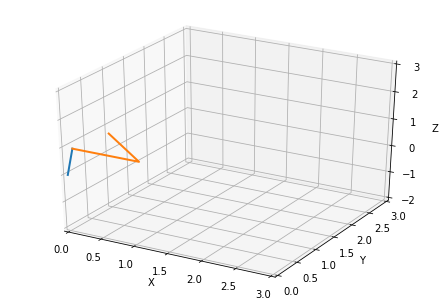

In [ ]:
z,record,coordinate_of_2_joint,coordinate_of_3_joint,coordinate_of_4_joint = intialize_variables(iterations = 50)

coordinate_of_2_joint,coordinate_of_3_joint,coordinate_of_4_joint = get_coordinate_of_joints(30,30,30,50,coordinate_of_2_joint,coordinate_of_3_joint,coordinate_of_4_joint)

run_animation(coordinate_of_2_joint,coordinate_of_3_joint,coordinate_of_4_joint,Frames=50, frames_per_sec = 10)

Reference Code used

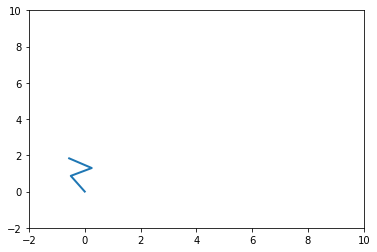

In [ ]:
def plotResults(coordinate_of_2_joint,coordinate_of_3_joint,coordinate_of_4_joint):
    #----- Changes for animating 2D drone ------#
    fig = plt.figure()  
    axis = plt.axes(xlim =(-2,10 ),ylim =(-2, 10))   
    line, = axis.plot([], [], lw = 2)
    x_coordinate_of_2_joint,y_coordinate_of_2_joint,z_coordinate_of_2_joint = coordinate_of_2_joint
    x_coordinate_of_3_joint,y_coordinate_of_3_joint,z_coordinate_of_3_joint = coordinate_of_3_joint
    x_coordinate_of_4_joint,y_coordinate_of_4_joint,z_coordinate_of_4_joint = coordinate_of_4_joint
    def init():  
      line.set_data([], [])  
      return line,    
    def animate(i):
      line.set_data([0,x_coordinate_of_2_joint[i],x_coordinate_of_3_joint[i],x_coordinate_of_4_joint[i]],[0,y_coordinate_of_2_joint[i],y_coordinate_of_3_joint[i],y_coordinate_of_4_joint[i]])
      return line,

    anim = animation.FuncAnimation(fig, animate,init_func = init, frames = 50, 
                            interval = 10,  
                            blit = True)
    anim.save('2DDrone.mp4', writer = 'ffmpeg', fps = 10)
plotResults(coordinate_of_2_joint,coordinate_of_3_joint,coordinate_of_4_joint)

NameError: ignored

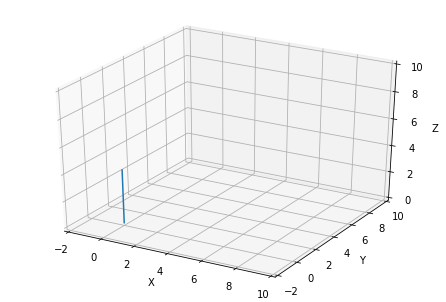

In [ ]:
import matplotlib.pyplot as plt

# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)

#ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d([-2.0, 10.0])
ax.set_xlabel('X')

ax.set_ylim3d([-2.0, 10.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z') 

def init():
    #ax.clear()
    ax.plot3D([0,0],[0,0],[0,4])
    
    

def animate(i):
    #X,Y,Z = [0,x_coordinate_of_3_joint[i]],[0,y_coordinate_of_3_joint[i]],[[4,z_coordinate_of_3_joint[i]],[4,z_coordinate_of_3_joint[i]]]
    #ax.plot_wireframe(np.array(X),np.array(Y),np.array(Z))
    #ax.clear()
    ax.plot3D([0,x_coordinate_of_3_joint[i],x_coordinate_of_4_joint[i]],[0,y_coordinate_of_3_joint[i],y_coordinate_of_4_joint[i]],[4,z_coordinate_of_3_joint[i],z_coordinate_of_4_joint[i]])
    #ax.plot3D([x_coordinate_of_3_joint[i],x_coordinate_of_4_joint[i]],[y_coordinate_of_3_joint[i],y_coordinate_of_4_joint[i]],[z_coordinate_of_3_joint[i],z_coordinate_of_4_joint[i]])
    #ax.plot3D([[x_coordinate_of_3_joint[i],x_coordinate_of_4_joint[i]],[y_coordinate_of_3_joint[i],y_coordinate_of_4_joint[i]],[z_coordinate_of_3_joint[i],z_coordinate_of_4_joint[i]])
    
    
anime = animation.FuncAnimation(fig,animate,init_func = init,frames=50)
anime.save('roboticarm.mp4',writer = 'ffmpeg',fps=30)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# References
# https://gist.github.com/neale/e32b1f16a43bfdc0608f45a504df5a84
# https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
# https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation
 
# ANIMATION FUNCTION
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line
 
 
# THE DATA POINTS
t = np.arange(0,20,0.2) # This would be the z-axis ('t' means time here)

dataSet = np.array([x_coordinate_of_4_joint, y_coordinate_of_4_joint, z_coordinate_of_4_joint])
numDataPoints = iterations
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('time')
ax.set_title('Trajectory of electron for E vector along [120]')
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=50, blit=False)
line_ani.save(r'AnimationNew.mp4')
 
 
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# References
# https://gist.github.com/neale/e32b1f16a43bfdc0608f45a504df5a84
# https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
# https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation
 
# ANIMATION FUNCTION
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line
 
 
# THE DATA POINTS
t = np.arange(0,20,0.2) # This would be the z-axis ('t' means time here)
x = np.cos(t)-1
y = 1/2*(np.cos(2*t)-1)
dataSet = np.array([x, y, t])
numDataPoints = len(t)
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('time')
ax.set_title('Trajectory of electron for E vector along [120]')
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=50, blit=False)
line_ani.save(r'AnimationNew.mp4')
 
 
plt.show()